In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
set_config(display='diagram')

In [117]:
filename = 'Star39552_balanced.csv'
df = pd.read_csv(filename)
df.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39552 entries, 0 to 39551
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         39552 non-null  float64
 1   Plx          39552 non-null  float64
 2   e_Plx        39552 non-null  float64
 3   B-V          39552 non-null  float64
 4   SpType       39552 non-null  object 
 5   Amag         39552 non-null  float64
 6   TargetClass  39552 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.1+ MB


In [119]:
df['SpType'].value_counts()

K0III         2841
K1III         1742
K2III         1479
G8III         1474
K3III         1097
              ... 
K3II+...         1
B2/B3V:nn        1
WC8 + O9I        1
F0/F2V+...       1
M3/M4III:        1
Name: SpType, Length: 2576, dtype: int64

- Fuente de datos: https://www.kaggle.com/datasets/vinesmsuic/star-categorization-giants-and-dwarfs
- Breve descripción: Modelo de clasificación de ML, cuyas columnas son la magnitud visual de la estrella, la distancia entre la estrella y la tierra, el error del paralaje estelar (Plx), el color de la estrella, el tipo espectral y la magnitud absoluta de la estrella.
- ¿Cual es el objetivo?: Predecir si una estrella es enana (0) o gigante (1).
- ¿Este es un problema de clasificación o regresión?: Clasificación.
- ¿Cuántas características hay?: 6 características.
- ¿Cuántas filas de datos hay?: 39552 filas.
- ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?: realizar una estandarización de los datos y también un ohe para la característica "SpType".

In [120]:
df.duplicated().sum()

0

In [121]:
df.isna().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

C:\Users\fabia\AppData\Local\Temp\ipykernel_12200\215740514.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


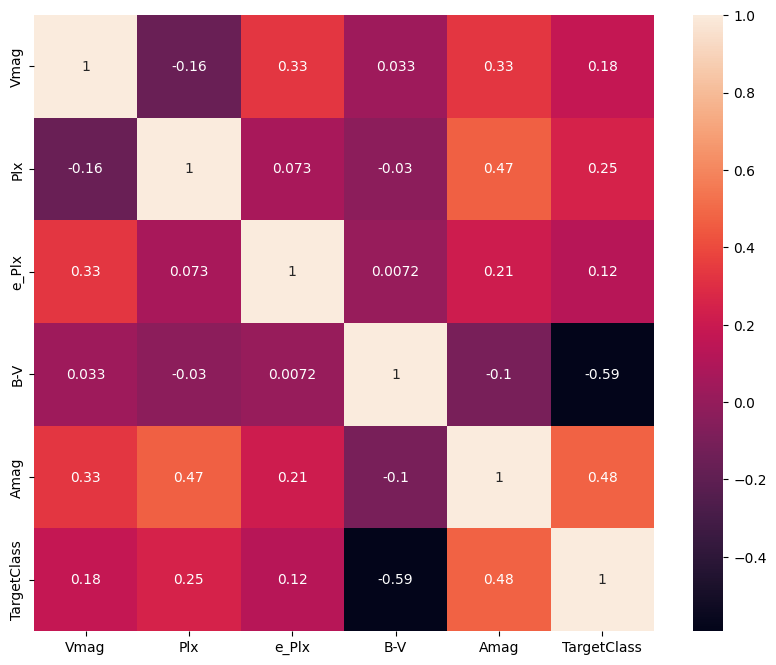

In [122]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(),annot=True)

plt.show()

Las características que más se correlacionan con la TargetClass, son: B-V Color Index y Amag.

<AxesSubplot: xlabel='TargetClass', ylabel='B-V'>

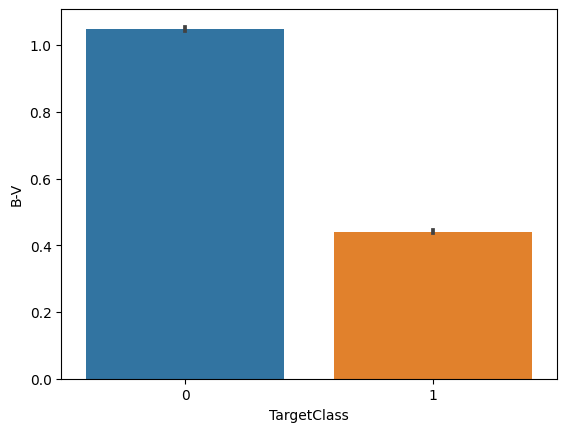

In [123]:
#Analizamos como se relaciona B-V con target
sns.barplot(x=df['TargetClass'],y=df['B-V'])

<AxesSubplot: xlabel='TargetClass', ylabel='Amag'>

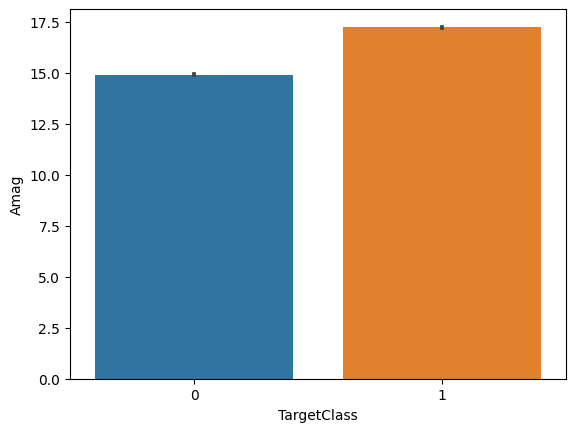

In [124]:
#Analizamos como se relaciona Amag con target
sns.barplot(x=df['TargetClass'],y=df['Amag'])

Una vez analizados los datos y también realizada la limpieza, se realiza un train_test_split

In [133]:
X = df.drop(columns='TargetClass')
y = df['TargetClass']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)